# import library

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np 
import matplotlib.pyplot as plt

# Load Mnist Dataset

In [2]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Split into train/test datasets and change shape

In [3]:
train_images = tf.reshape(train_images, [-1, 28, 28, 1])
test_images = tf.reshape(test_images, [-1, 28, 28, 1])

# Models

## Model1 : 3 Layers with 1 Convolution layer

## Model2 : 5 Layers with 2 Convolution layer

## Model3 : 7 Layers with 4 Convolution layer

In [4]:

def select_model(model_number):
    if model_number == 1:
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28,1)),  # layer 1 
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 2 
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])                                # layer 3

    if model_number == 2:
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)),     # layer 1 
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 2
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 3 
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 4
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])                                # layer 5
                    
    if model_number == 3: 
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28,1)),  # layer 1
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 2
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 3
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 4
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 5
                    keras.layers.Conv2D(128, (3,3), activation = 'relu'),                           # layer 6
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])                                # layer 7
    
    return model

In [5]:
model1=select_model(1)
model2=select_model(2)
model3=select_model(3)

# Model Compile

In [6]:
model1.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model3.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# Training Step

## Model1

In [7]:
model1.fit(train_images, train_labels,  epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.5904 - accuracy: 0.9390
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0851 - accuracy: 0.9747
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0729 - accuracy: 0.9777
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0612 - accuracy: 0.9811
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0536 - accuracy: 0.9834


## Model2

In [8]:
model2.fit(train_images, train_labels,  epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3192 - accuracy: 0.9480
Epoch 2/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0677 - accuracy: 0.9790
Epoch 3/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0518 - accuracy: 0.9844
Epoch 4/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0454 - accuracy: 0.9859
Epoch 5/5
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0387 - accuracy: 0.98800s - loss: 0.0387 - accuracy: 0.98


## Model3

In [9]:
model3.fit(train_images, train_labels,  epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.1657 - accuracy: 0.9579
Epoch 2/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0543 - accuracy: 0.9830
Epoch 3/5
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0439 - accuracy: 0.9870
Epoch 4/5
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0354 - accuracy: 0.9895
Epoch 5/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0344 - accuracy: 0.9895


# Test Step
## Perform Test

### Model1

In [10]:
test_loss, accuracy = model1.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ', test_loss)
print('Test accuracy :', accuracy)

313/313 - 1s - loss: 0.1041 - accuracy: 0.9739

Test loss :  0.10405870527029037
Test accuracy : 0.9739000201225281


### Model2

In [11]:
test_loss, accuracy = model2.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ', test_loss)
print('Test accuracy :', accuracy)

313/313 - 2s - loss: 0.0581 - accuracy: 0.9854

Test loss :  0.058120906352996826
Test accuracy : 0.9854000210762024


### Model3

In [12]:
test_loss, accuracy = model3.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ', test_loss)
print('Test accuracy :', accuracy)

313/313 - 2s - loss: 0.0286 - accuracy: 0.9922

Test loss :  0.028560398146510124
Test accuracy : 0.9922000169754028


## Change image type and Make Prediction

In [13]:
test_images = tf.cast(test_images, tf.float32)
pred1 = model1.predict(test_images)
pred2 = model2.predict(test_images)
pred3 = model3.predict(test_images)
Number = [0,1,2,3,4,5,6,7,8,9]

## Functions for plot images, probability

In [14]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(Number[predicted_label],
                                100*np.max(predictions_array),
                                Number[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  plt.xticks(Number)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [15]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## Result

### Model1

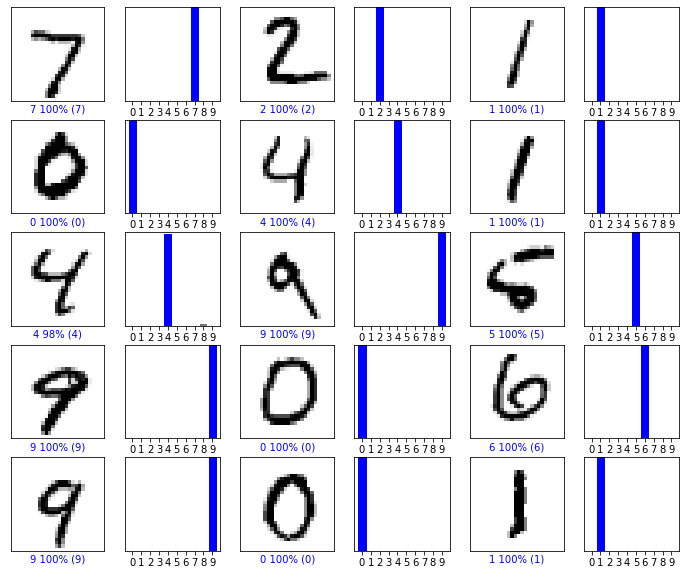

In [23]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred1, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred1, test_labels)
plt.show()

### Model2

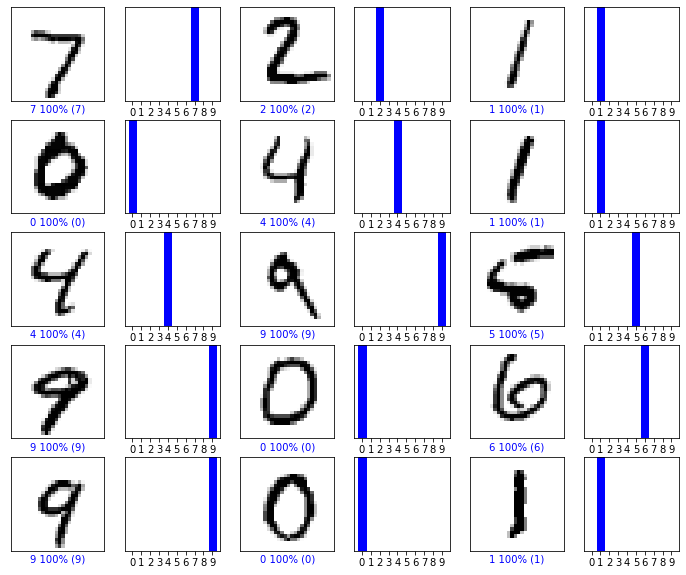

In [17]:
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred2, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred2, test_labels)
plt.show()

### Model3

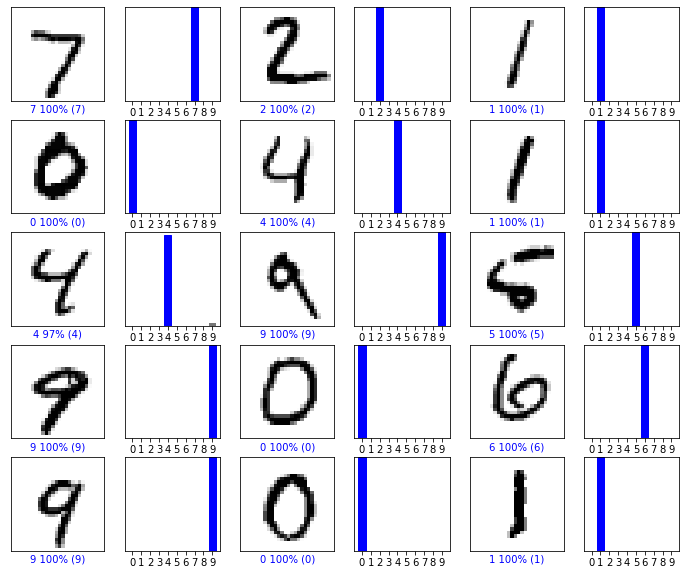

In [18]:
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred3, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred3, test_labels)
plt.show()

## Function for Error

In [19]:
def error_mnist(prediction_array, true_label):
    error_index = []
    
    for i in range(true_label.shape[0]):
        if np.argmax(prediction_array[i]) != true_label[i]:
            error_index.append(i)
    return error_index

# change num_cols, num_rows if you want to see more result.  
def plot_error(index, prediction_array, true_label):
    num_cols = 5
    num_rows = 5
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))

    assert len(index) < num_cols * num_rows
    for i in range(len(index)):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        idx = index[i]
        plt.imshow(test_images[idx])
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plt.bar(range(10), prediction_array[idx])
        plt.xticks(Number)

### Error: Model1

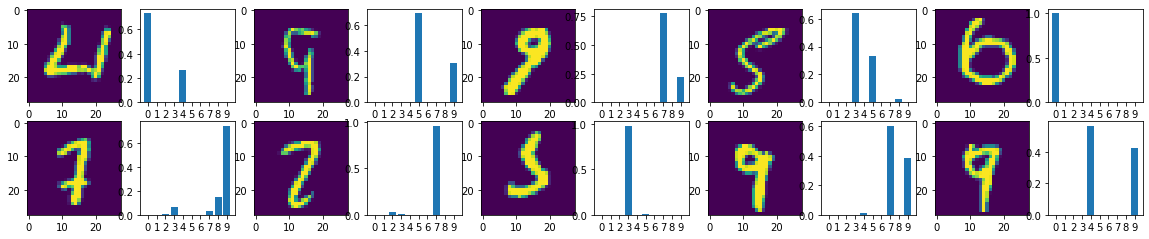

In [20]:
index = error_mnist(pred1, test_labels)
index_slice = index[:10]
plot_error(index_slice, pred1, test_labels)

### Error: Model2

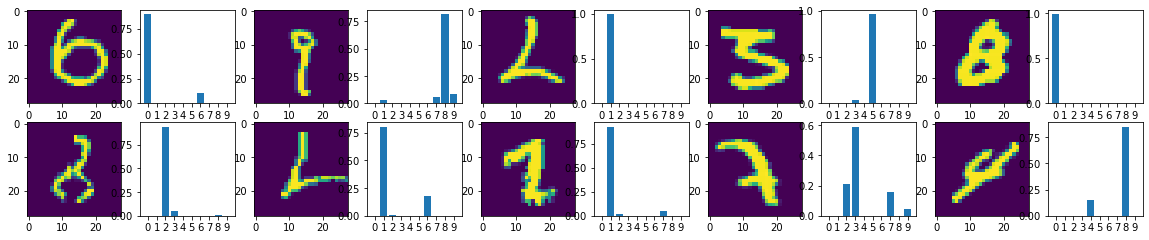

In [21]:
index = error_mnist(pred2, test_labels)
index_slice = index[:10]
plot_error(index_slice, pred2, test_labels)

### Error: Model3

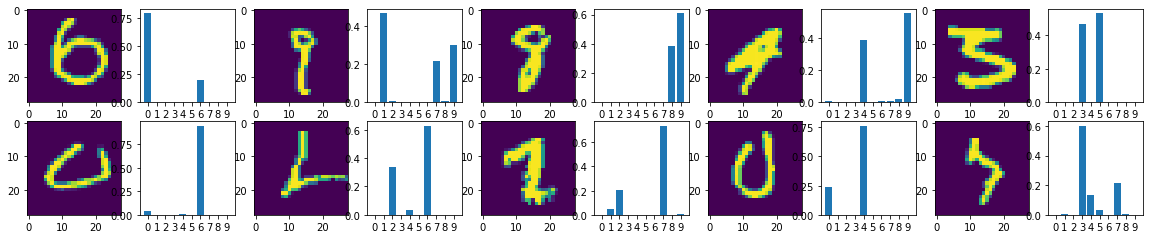

In [22]:
index = error_mnist(pred3, test_labels)
index_slice = index[:10]
plot_error(index_slice, pred3, test_labels)